# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    # Your code here
    zero_idx = np.where(arr == 0)[0]
    if len(zero_idx) == 0:
        return 0
    if zero_idx[-1] == len(arr) - 1:
        return np.amax(arr[zero_idx[:-1] + 1])
    else:
        return np.amax(arr[zero_idx + 1])

print(max_element(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])))

5


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(x, v):
    x_np = np.asarray(x)
    return np.argmin(np.abs(x_np - v))

print(nearest_value(np.arange(0, 10).reshape((2, 5)), 3.6))

4


Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(x):
    # Your code here
    means = np.mean(x, axis=0)
    stds = np.std(x, axis=0)
    return np.divide((x - means),
                     stds,
                     out=np.zeros(x.shape, dtype=float),
                     where=stds!=0)
in_matrix = np.random.randint(low=0, high=100, size=(3, 4))
print(in_matrix)
print(scale(in_matrix))
#print(scale(np.array([[2, 0, 1], [1, 5, 45]])))

[[94 61 21 89]
 [35 13 49 54]
 [88 40 32 99]]
[[ 0.8172384   1.17066918 -1.12865821  0.43193421]
 [-1.40816462 -1.2724665   1.30229793 -1.38218948]
 [ 0.59092622  0.10179732 -0.17363972  0.95025527]]


 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [5]:
def get_stats(x):
    # Your code here
    det = np.linalg.det(x)
    trace = np.trace(x)
    minx = np.amin(x)
    maxx = np.amax(x)
    fro = np.linalg.norm(x, ord="fro")
    self_num = np.linalg.eig(x)
    inv = np.linalg.inv(x)
    return {"determinant": det,
            "trace": trace,
            "minimum" : minx,
            "maximum": maxx,
            "Frobenius": fro,
            "self": self_num,
            "invert": inv
            }
x = np.random.normal(10, 1, (5, 5))
print(x)
get_stats(x)

[[ 9.37728054 10.30316769 10.30900127  8.8504669  11.30660457]
 [10.7060894   8.99309635  8.22017835 12.1179022  10.72804267]
 [10.5710188  10.85817844 10.65415736 11.13778686 10.19281933]
 [ 9.38899212 10.99699552  9.29748154 11.47258231 10.45345752]
 [ 8.72172251 10.57138782  9.4403424  11.98507566  9.79008952]]


{'determinant': -194.2378608172921,
 'trace': 50.28720608240813,
 'minimum': 8.220178346966174,
 'maximum': 12.117902201175092,
 'Frobenius': 51.5314793583255,
 'self': (array([51.27239767+0.j        ,  1.70302137+0.j        ,
         -1.92950887+0.j        , -0.37935204+1.00447504j,
         -0.37935204-1.00447504j]),
  array([[ 0.43725328+0.j        ,  0.48727765+0.j        ,
          -0.28612923+0.j        , -0.39488982-0.26138816j,
          -0.39488982+0.26138816j],
         [ 0.44200726+0.j        , -0.26973339+0.j        ,
           0.8812573 +0.j        , -0.52709579+0.j        ,
          -0.52709579-0.j        ],
         [ 0.46585097+0.j        ,  0.64055024+0.j        ,
          -0.08923554+0.j        ,  0.29215721+0.30125135j,
           0.29215721-0.30125135j],
         [ 0.44981751+0.j        , -0.3599483 +0.j        ,
          -0.31076728+0.j        ,  0.15225029+0.18706109j,
           0.15225029-0.18706109j],
         [ 0.44055219+0.j        , -0.38721699+0.j    

Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [6]:
result = list()

for exp_num in range(100):
    # Your code here
    nm1 = np.random.normal(size=(10, 10))
    nm2 = np.random.normal(size=(10, 10))
    result.append(np.amax(np.dot(nm1, nm2)))

print(np.quantile(result, 0.95))

12.386805334960439


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [7]:
import pandas as pd
%matplotlib inline
temp_url = "http://80.211.60.122/2008.csv"
data = pd.read_csv(filepath_or_buffer=temp_url)

Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [8]:
# Your code here
cancellation_reasons = {"A": "carrier",
                        "B": "weather",
                        "C": "NAS",
                        "D": "security"
                        }
print(f"Most frequent cancellation reason is "
      f"{cancellation_reasons[data.CancellationCode.value_counts().keys()[0]]}")

Most frequent cancellation reason is carrier


 Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [9]:
# Your code here
print(
    " ".join((str(data.Distance.mean()),
    str(data.Distance.max()),
    str(data.Distance.min()))))

724.5082571428571 4962 31


 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [10]:
# Your code here
min_distance = data.Distance.min()
print(data.loc[data['Distance'] == min_distance][['DayofMonth', 'Month',
      'Year', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Distance']])
min_planes = data.query(f'Distance == {min_distance}')['TailNum'].drop_duplicates()
other_flights = data.loc[data['TailNum'].isin(min_planes)][['FlightNum', 'TailNum', 'Distance']]
other_flights[other_flights['Distance'] != min_distance]

       DayofMonth  Month  Year  DayOfWeek UniqueCarrier  FlightNum TailNum  \
1116           30     12  2008          2            AS         65  N795AS   
6958           26     12  2008          5            AS         65  N795AS   
17349          18      8  2008          1            AS         64  N768AS   
27534          11      3  2008          2            AS         64  N764AS   
46082           9      8  2008          6            AS         65  N708AS   
48112          28      2  2008          4            AS         64  N762AS   

       Distance  
1116         31  
6958         31  
17349        31  
27534        31  
46082        31  
48112        31  


FlightNum TailNum  Distance
84            61  N764AS       160
994          164  N762AS      1449
1872         152  N762AS       183
1951          52  N768AS       503
2179          61  N764AS       199
...          ...     ...       ...
67275        151  N768AS       539
67631         61  N762AS       160
67994         66  N764AS       199
68514        151  N764AS       549
69107        351  N795AS       671

[96 rows x 3 columns]

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [11]:
# Your code here
airports_data = pd.read_csv("http://stat-computing.org/dataexpo/2009/airports.csv")
max_iata_code = data['Origin'].value_counts().keys()[0]
airports_data.loc[airports_data['iata'] == max_iata_code]

iata                            airport     city state country        lat  \
880  ATL  William B Hartsfield-Atlanta Intl  Atlanta    GA     USA  33.640444   

          long  
880 -84.426944

Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [12]:
# Your code here
data[['Origin', 'AirTime']].groupby(['Origin']).mean().sort_values('AirTime', ascending=False).merge(airports_data[['iata', 'city', 'state']], left_on='Origin', right_on='iata', how='left')

AirTime iata              city state
0    205.200000  SJU          San Juan    PR
1    193.954545  BQN         Aguadilla    PR
2    191.875000  PSE             Ponce    PR
3    185.029412  STT  Charlotte Amalie    VI
4    165.415094  ANC         Anchorage    AK
..          ...  ...               ...   ...
292   20.250000  PSG        Petersburg    AK
293   19.666667  OXR            Oxnard    CA
294   18.000000  WRG          Wrangell    AK
295   13.000000  GST          Gustavus    AK
296         NaN  DLG        Dillingham    AK

[297 rows x 4 columns]

Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [13]:
# Your code here
#Общее число вылетов >= 1000:
all_flights_1000 = data.groupby(['Origin']).size().reset_index(name='Count').query('Count >= 1000').set_index('Origin')
data1 = data[data.Origin.isin(all_flights_1000.index)]
data2 = data1[data1.DepDelay > 0].groupby('Origin').size().reset_index(name='Count').set_index('Origin')
print(data2.div(all_flights_1000).sort_values(ascending=False, by='Count').iloc[0])


Count    0.511159
Name: EWR, dtype: float64


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [14]:
# Your code here
print("Is NA data values?", data.isnull().values.any())
print("All NA data values in data frame:", data.isnull().sum().sum())
print("All NA rows:", data.isnull().any(axis=1).count())
print("Properties NA:", "\n", data[data.columns[data.isnull().any()]].isnull().sum(), sep="")

Is NA data values? True
All NA data values in data frame: 355215
All NA rows: 70000
Properties NA:
DepTime               1399
ArrTime               1556
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
TaxiIn                1556
TaxiOut               1406
CancellationCode     68589
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [15]:
# Your code here
data_delay_notna = data[data['DepDelay'].notna() | data['DepDelay'] != 0]
data_delay_notna[['Origin', 'UniqueCarrier', 'FlightNum', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'DepDelay']].head()

Origin UniqueCarrier  FlightNum  Year  Month  DayofMonth  DayOfWeek  \
0    MDW            WN        242  2008      6          18          3   
1    IAH            XE       2380  2008      6           4          3   
2    MDW            WN       1769  2008      8           3          7   
3    SLC            OO       3802  2008      1          23          3   
4    LAS            WN        399  2008      5           4          7   

   DepTime  DepDelay  
0   2111.0      16.0  
1   1426.0      16.0  
2   1143.0      -2.0  
3   1141.0      -3.0  
4    815.0      -5.0

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [16]:
# Your code here
def get_hours(t):
    return t // 100

def get_minutes(t):
    return t % 100

for f in ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]:
    hours = data_delay_notna[f].apply(get_hours)
    minutes = data_delay_notna[f].apply(get_minutes)
    h_name = f + "_Hour"
    m_name = f + "_Minute"
    data_delay_notna[h_name] = hours
    data_delay_notna[m_name] = minutes
data_delay_notna.drop(columns=["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"], inplace=True)
print(data_delay_notna.columns)
print(data_delay_notna.head(5))

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour',
       'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')
   Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0  2008      6          18          3            WN        242  N699SW   
1  2008      6           4          3            XE       2380  N15980   
2  2008      8           3          7            WN       1769  N464WN   
3  2008      1          23          3            OO       3802  N465SW   
4  2008      5           4          7            WN        399  N4

<ipython-input-16-5960a081930c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_delay_notna[h_name] = hours
<ipython-input-16-5960a081930c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_delay_notna[m_name] = minutes
/opt/Py/ML/venv/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [28]:
# Your code here
#data_delay_notna.drop("TailNum")
#data_delay_notna.drop(["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"])
data_delay_notna.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'DepTime_Hour', 'DepTime_Minute',
       'CRSDepTime_Hour', 'CRSDepTime_Minute', 'ArrTime_Hour',
       'ArrTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute'],
      dtype='object')

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

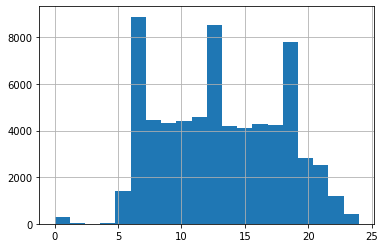

In [18]:
data_delay_notna['DepTime_Hour'].hist(bins=20)

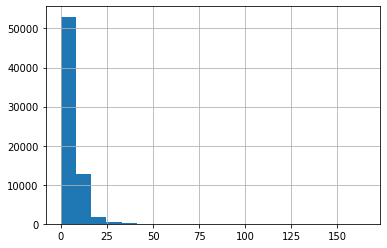

In [19]:
data_delay_notna['TaxiIn'].hist(bins=20)

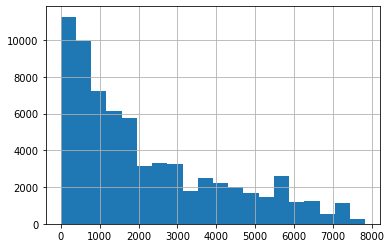

In [20]:
data_delay_notna['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [ ]:
def transform_data(data):
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [ ]:
# Your code here

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [ ]:
# Your code here

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.